# Modélisation et optimisation des modèles arbre de décision et SVM sur les données 'Digits' et les données 'Iris'


Ce notebook présente une étude pratique sur les algorithmes de Support Vector Machine (SVM) et arbre de décision, appliqués à des ensembles de données classiques disponibles dans la bibliothèque scikit-learn. L'objectif principal est de comprendre et d'illustrer le fonctionnement des SVM, en commençant par une réduction de la dimensionnalité avec la méthode PCA pour une visualisation claire des données. Les étapes incluent l'importation des données "Digits" et "Iris", leur exploration et leur transformation, ainsi que la mise en œuvre de modèles SVM adaptés. Cette analyse vise à renforcer la maîtrise des outils essentiels pour le traitement des données et l'apprentissage supervisé.

# Partie 1: Données Digits

importation des bibliothèques

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits, load_iris
from sklearn.model_selection import train_test_split

importer les données "Digits" depuis la library sickit-learn

In [ ]:
digits=load_digits(n_class=10, return_X_y=False, as_frame=True)

extraire les features et la variables cible sous forme de dataframe

In [ ]:
X=pd.DataFrame(digits.data)
y=pd.DataFrame(digits.target)

In [ ]:
y.value_counts() # afficher les valeurs de la variable cible

target
3         183
1         182
5         182
4         181
6         181
9         180
7         179
0         178
2         177
8         174
Name: count, dtype: int64

<ipython-input-215-17a66d60c82a>:12: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



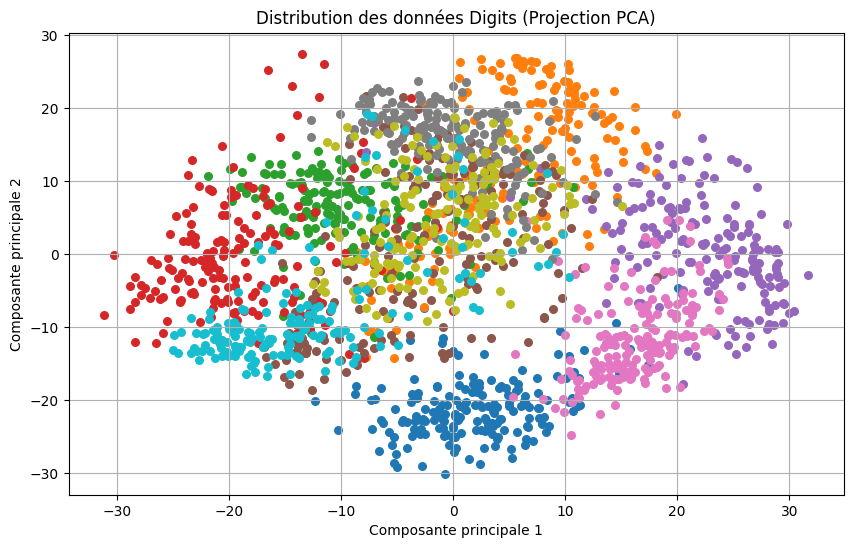

In [ ]:
from sklearn.decomposition import PCA

# Réduction de dimension avec PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
unique_classes=np.unique(y)

y_array = y.values.ravel()
# Visualisation
plt.figure(figsize=(10, 6))
for i, label in enumerate(unique_classes):
    scatter = plt.scatter(X_pca[y_array == label, 0], X_pca[y_array == label, 1], cmap='tab10', s=30, label=f'Classe {label}')

plt.title("Distribution des données Digits (Projection PCA)")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.grid(True)
plt.show()


On a normalement 64 features en total, c'est pour cela on a réduit la dimension des données en 2D à l'aide de technique de l'ACP pour présenter la distribution des données Digits

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardisation des données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


La standarisation des donnnées est importante surtout pour les modèles SVM qui sont sensibles à l'échelle des données donc afin de garantir l'efficacité des résultats obtenus on doit normaliser les données en soustayant la moyenne et divisant par l'écart type pour une meilleure modélisation

**Choix des paramètres:**

Les paramètres sélectionnés pour l’arbre de décision permettent une exploration approfondie de sa complexité et de sa capacité à généraliser :

*   **criterion** : Utilise les critères **gini** et **entropy** pour évaluer la qualité des divisions des noeuds.
*   **max_depth** : Limite la profondeur de l'arbre pour contrôler la complexité.
*   **min_samples_split** : Définit le nombre minimum d’échantillons pour diviser un noeud.
*   **min_samples_leaf** : Contrôle le nombre minimal d’échantillons dans une feuille, pour éviter les feuilles trop petites.
*   **ccp_alpha** : Régule l’élagage de l’arbre, avec des valeurs allant de 0 (pas d'élagage) à des niveaux élevés pour simplifier l'arbre.

Les paramètres choisis pour le modèle Support Vector Machine offrent une flexibilité pour traiter différents types de relations dans les données :

*   **C **: Paramètre de régularisation pour ajuster le compromis entre la marge de séparation et les erreurs de classification.
*   **kernel** : Explore différents noyaux (linear, poly, rbf, sigmoid) pour transformer l’espace des caractéristiques.
*   **gamma** : Contrôle l’influence d’un point individuel, en utilisant des réglages automatiques comme scale et auto.
*   **degree** : Ajuste la complexité pour le noyau polynomial, en explorant des degrés de 2 à 5.


In [ ]:
dt_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20, 25],
    'min_samples_split': [2, 3, 5, 8, 10, 12, 15],
    'min_samples_leaf': [1, 2,3,4,5, 6, 8, 12],
    'ccp_alpha': [0.0, 0.01, 1, 5]
}

svm_params = {
        'C': [0.01, 0.1, 1, 10, 100],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'gamma': ['scale', 'auto'],
        'degree': [2, 3, 4, 5]
    }

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# fonctions pour effectuer GridSearch pour les dux modèles

def grid_search_decision_tree(X_train, y_train, X_test, y_test, params):
    # construction du modèle
    dt_model = DecisionTreeClassifier(random_state=42)

    # Grid Search avec validation croisée
    dt_grid = GridSearchCV(dt_model, params, cv=3, scoring='accuracy') # le métrique 'Accuracy' est choisi pour évaluer la performance du modèle
    dt_grid.fit(X_train, y_train)

    # Meilleurs paramètres
    print(f"Meilleurs paramètres pour l'arbre de décision : {dt_grid.best_params_}")
    print(f"Score de validation croisée : {dt_grid.best_score_}")

    # Évaluation pour l'arbre de décision
    dt_best_model = dt_grid.best_estimator_
    y_pred_dt = dt_best_model.predict(X_test)
    dt_test_score = accuracy_score(y_test, y_pred_dt)
    print(f"Score sur le test set (Arbre de Décision) : {dt_test_score}")

def grid_search_svm(X_train, y_train, X_test, y_test, params):

    # Correction pour y
    y_train = y_train.values.flatten()

    # Construction du modèle
    svm_model = SVC(random_state=42)

    # Grid Search avec validation croisée
    svm_grid = GridSearchCV(svm_model, params, cv=3, scoring='accuracy')
    svm_grid.fit(X_train, y_train)

    # Meilleurs paramètres
    print(f"Meilleurs paramètres pour le SVM : {svm_grid.best_params_}")
    print(f"Score de validation croisée : {svm_grid.best_score_}")

    # Évaluation pour le SVM
    svm_best_model = svm_grid.best_estimator_
    y_pred_svm = svm_best_model.predict(X_test)
    svm_test_score = accuracy_score(y_test, y_pred_svm)
    print(f"Score sur le test set (SVM) : {svm_test_score}")


In [ ]:
grid_search_decision_tree(X_train, y_train, X_test, y_test, dt_params)

Meilleurs paramètres pour l'arbre de décision : {'ccp_alpha': 0.0, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Score de validation croisée : 0.8544152744630072
Score sur le test set (Arbre de Décision) : 0.8518518518518519


In [ ]:
grid_search_decision_tree(X_train, y_train, X_test, y_test, dt_params)

Meilleurs paramètres pour l'arbre de décision : {'ccp_alpha': 0.001, 'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Score de validation croisée : 0.8544152744630072
Score sur le test set (Arbre de Décision) : 0.8481481481481481


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [ ]:
grid_search_decision_tree(X_train, y_train, X_test, y_test, dt_params)

Meilleurs paramètres pour l'arbre de décision : {'ccp_alpha': 0.0, 'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
Score de validation croisée : 0.8544152744630072
Score sur le test set (Arbre de Décision) : 0.8518518518518519


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [ ]:
grid_search_decision_tree(X_train, y_train, X_test, y_test, dt_params)

Meilleurs paramètres pour l'arbre de décision : {'ccp_alpha': 0.0, 'criterion': 'gini', 'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 2}
Score de validation croisée : 0.8544152744630072
Score sur le test set (Arbre de Décision) : 0.8518518518518519


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Après avoir tester plusieurs combinaisons des paramètres celle qui nous a donné la meilleure performance pour les arbres de décision est: {'ccp_alpha': 0.0, 'criterion': 'gini', 'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 2} **mais on doit vérifier s'il y de l'overfitting ou pas**

In [ ]:
grid_search_svm(X_train, y_train, X_test, y_test, svm_params)

Meilleurs paramètres pour le SVM : {'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Score de validation croisée : 0.9809069212410502
Score sur le test set (SVM) : 0.9814814814814815


In [ ]:
grid_search_svm(X_train, y_train, X_test, y_test, svm_params)

Meilleurs paramètres pour le SVM : {'C': 6, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}
Score de validation croisée : 0.9793158313444709
Score sur le test set (SVM) : 0.9777777777777777


In [ ]:
grid_search_svm(X_train, y_train, X_test, y_test, svm_params)

Meilleurs paramètres pour le SVM : {'C': 5, 'gamma': 'scale', 'kernel': 'rbf'}
Score de validation croisée : 0.9809069212410502
Score sur le test set (SVM) : 0.9814814814814815


De meme pour SVM meilleur combinaison des paramètres en utilisant GridSearch est: {'C': 5, 'gamma': 'scale', 'kernel': 'rbf'}

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

#fonction pour tester la robustesse des modèles face à de nouvelles données en utilsant la techique de validation croisér avec 10 itérations

def cross_validation_visualization(model, X, y, n_iterations=10, test_size=0.3):
    """
    Effectue une validation croisée personnalisée sur plusieurs itérations
    et visualise les performances sur les ensembles d'entraînement et de test.

    Parameters:
        model: Modèle à évaluer.
        X: Données d'entrée.
        y: Labels.
        n_iterations: Nombre d'itérations pour la validation croisée (par défaut 10).
        test_size: Proportion des données de test (par défaut 0.3).
        random_state: Contrôle du caractère aléatoire (par défaut None).

    Returns:
        None
    """
    train_scores = []
    test_scores = []

    # Correction pour y
    y = y.values.flatten()

    for i in range(n_iterations):
        # Génération des ensembles d'entraînement et de test
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.3, random_state=np.random.randint(0, 10000), stratify=y
        )
        # Standardisation des données
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        # Entraînement du modèle
        model.fit(X_train, y_train)

        # Évaluer la précision sur l'entraînement
        y_pred_train = model.predict(X_train)
        train_score = accuracy_score(y_train, y_pred_train)
        train_scores.append(train_score)

        # Évaluer la précision sur le test
        y_pred_test = model.predict(X_test)
        test_score = accuracy_score(y_test, y_pred_test)
        test_scores.append(test_score)

    # Visualisation des performances
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, n_iterations + 1), train_scores, marker='o', label='Train Accuracy', color='blue')
    plt.plot(range(1, n_iterations + 1), test_scores, marker='o', label='Test Accuracy', color='orange')
    plt.ylim(0, 1)
    plt.xlabel('Iteration')
    plt.ylabel('Accuracy')
    plt.title('Train vs Test Accuracy Across Iterations')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Résumé des résultats
    print(f"Précision moyenne sur les données d'entraînement : {np.mean(train_scores):.2f}")
    print(f"Précision moyenne sur les données de test : {np.mean(test_scores):.2f}")
    if np.mean(train_scores) > np.mean(test_scores) + 0.1:
        print("Indicateur potentiel d'overfitting.")
    elif np.mean(test_scores) > np.mean(train_scores) + 0.1:
        print("Indicateur potentiel d'underfitting.")
    else:
        print("Pas d'indicateur significatif d'overfitting ou d'underfitting.")


Construction des modèles en utlisant les paramètres obtenus à l'aide de GridSearch

In [ ]:
# Modèle
dt_model = DecisionTreeClassifier(ccp_alpha= 0.0, criterion= 'gini', max_depth= None, min_samples_leaf= 1, min_samples_split= 2, random_state=42)

# Modèle
svm_model = SVC(C= 5, gamma= 'scale', kernel= 'rbf', random_state=42)

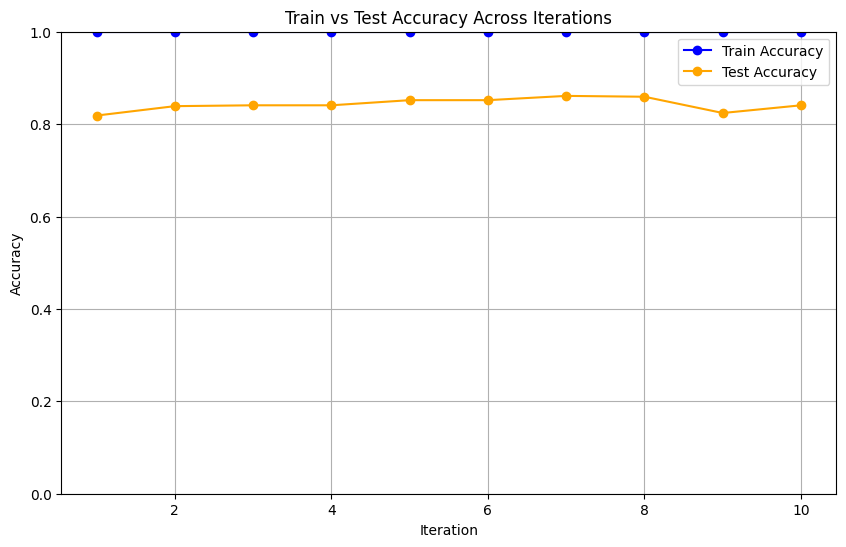

Précision moyenne sur les données d'entraînement : 1.00
Précision moyenne sur les données de test : 0.84
Indicateur potentiel d'overfitting.


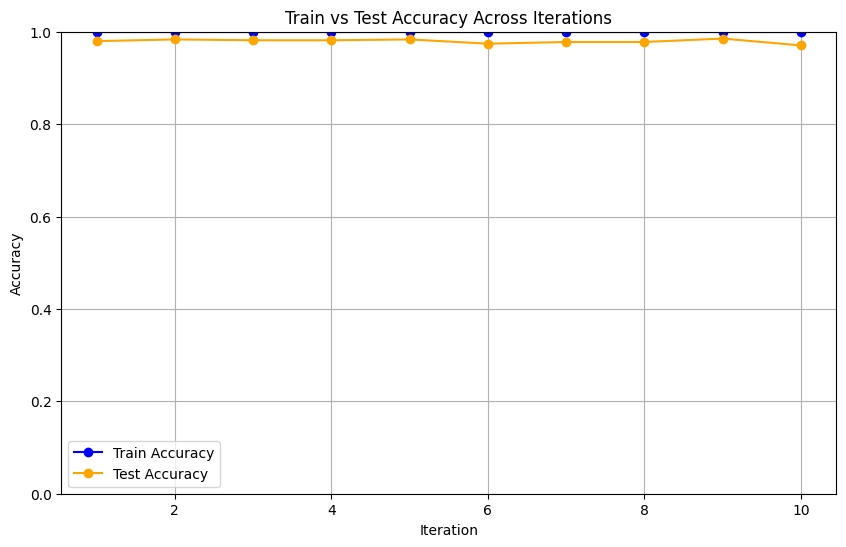

Précision moyenne sur les données d'entraînement : 1.00
Précision moyenne sur les données de test : 0.98
Pas d'indicateur significatif d'overfitting ou d'underfitting.


In [ ]:
# Exécuter la validation croisée personnalisée et visualiser
cross_validation_visualization(dt_model, X, y, n_iterations=10, test_size=0.3)
cross_validation_visualization(svm_model, X, y, n_iterations=10, test_size=0.3)

On remarque que les performances des deux modèles sont efficaces mais il y a certainement le problème de l'overfitting pour les deux modèles surtout Arbre de Décision, ceci est justifié par la performance parfaite (= 1) sur les données d'entrainement ce qui est impossible et performance médiocre pour DecisionTree model en comparaison avec la performance sur les données d'entrainement.

Ce problème est du au fait que Grid Search nous donne les parametres donnant les meilleurs performances mais on peut avoir de sur-apprentissage meme dans ce cas

Pour cela on va ajuster les paramètres de régularisation pour les deux modèles **ccp_alpha** pour DecisionTree et **C** pour SVM

In [ ]:
# Modèle
dt_model = DecisionTreeClassifier(ccp_alpha= 0.0025, criterion= 'gini', max_depth= None, min_samples_leaf= 1, min_samples_split= 2, random_state=42)

# Modèle
svm_model = SVC(C= 0.6, gamma= 'scale', kernel= 'rbf', random_state=42)

pour réduiser l'overfitting on doit augmenter **ccp_alpha** pour DT pour réduire la complexité de l'arbre et diminuer **C** pour SVM maximiser la marge mais sans tomber dans l'underfitting

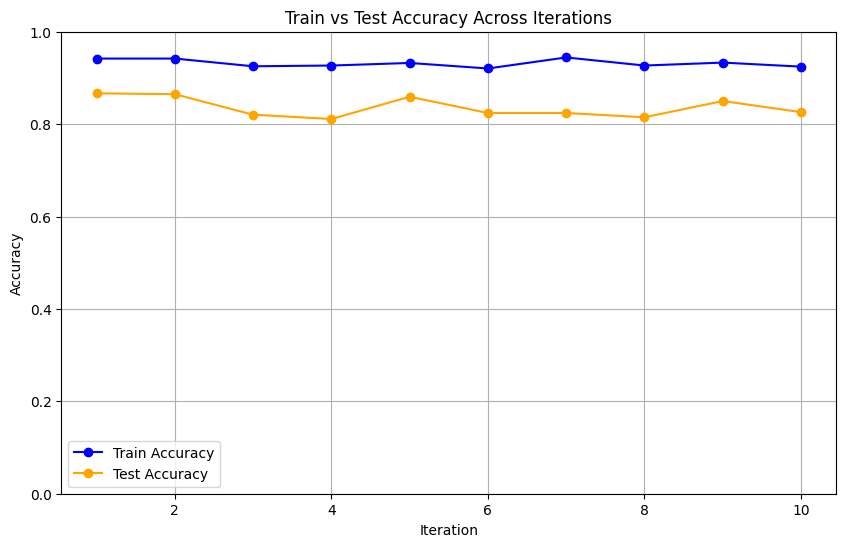

Précision moyenne sur les données d'entraînement : 0.93
Précision moyenne sur les données de test : 0.84
Pas d'indicateur significatif d'overfitting ou d'underfitting.


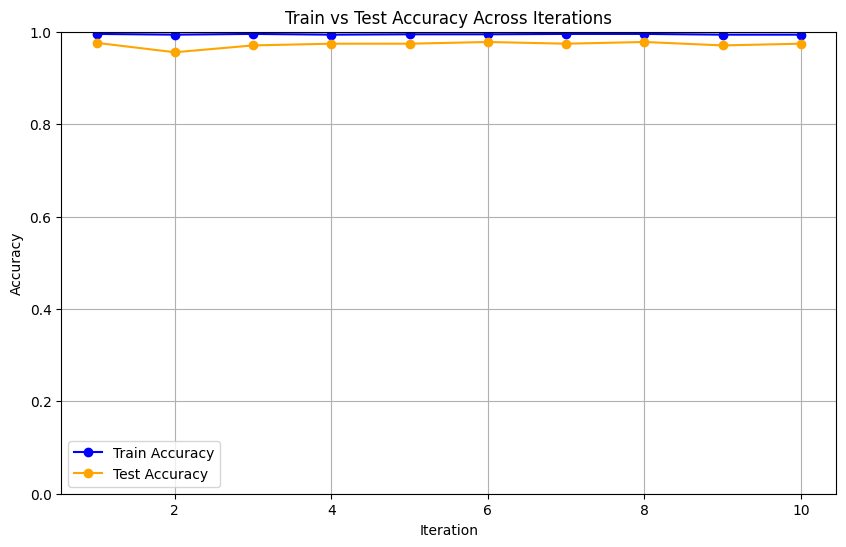

Précision moyenne sur les données d'entraînement : 0.99
Précision moyenne sur les données de test : 0.97
Pas d'indicateur significatif d'overfitting ou d'underfitting.


In [ ]:
# Exécuter la validation croisée personnalisée et visualiser
cross_validation_visualization(dt_model, X, y, n_iterations=10, test_size=0.3)
cross_validation_visualization(svm_model, X, y, n_iterations=10, test_size=0.3)

Après avoir tester différents valeurs de **ccp_alpha** et **C** voici les paramètres optimal pour les deux modèles:

*   ccp_alpha= 0.0025, criterion= 'gini', max_depth= None, min_samples_leaf= 1, min_samples_split= 2
*   C= 0.6, gamma= 'scale', kernel= 'rbf'



Le tableu des meilleurs performances sur les données Train et Test:

| Modèles\ Nature des données           | Données Train                                  | Données Test               |
|---------------------|----------------------------------------------|-----------------------------------|
| Arbre de décision | 0.93 | 0.84               |
| SVM | 0.99  | 0.97 |


**Bilan des résultats pour les données Digits:**

*   **Performance globale :** Les résultats obtenus indiquent que le SVM a une meilleure capacité à capturer la structure des données tout en généralisant mieux que l'arbre de décision.
*   **Stabilité des modèles :** Pour SVM, la différence est faible (99% vs 97%), indiquant une grande stabilité et une faible tendance à l'overfitting, tandis que pour Decision Tree, la différence est plus marquée (93% vs 84%), ce qui pourrait indiquer une légère surapprentissage sur les données d'entraînement.Donc SVM est plus **robuste**.
*   **Pour le SVM :**
    1.   C=0.6 : Offre un bon compromis entre maximisation de la marge et réduction des erreurs de classification.
    2.   gamma='scale' : Adapte automatiquement l’influence d’un point individuel, idéal pour des données non normalisées.
    3.   kernel='rbf' : Capture efficacement les relations non linéaires dans les données.

Le SVM est le modèle le plus performant et stable sur cet ensemble de données, grâce à sa capacité à trouver des marges maximales et à sa robustesse aux variations des données.




**Visualisations des hyperplans en 2D**:

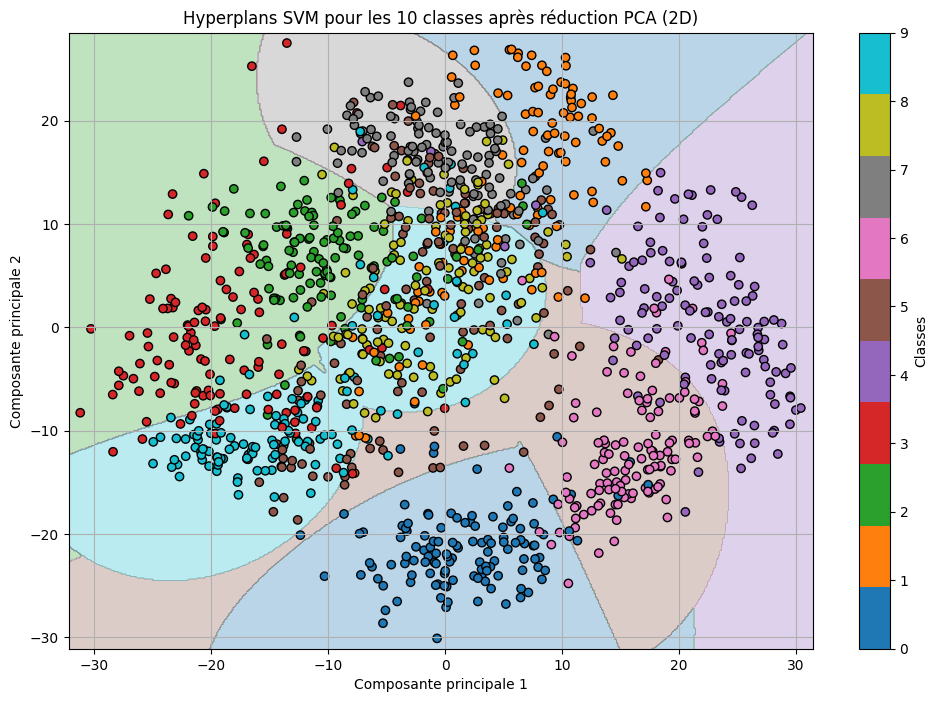

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

# Charger les données
digits = load_digits()
X, y = digits.data, digits.target

# Réduction de dimension avec PCA (2 dimensions)
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Diviser les données (si nécessaire)
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=42, stratify=y)

# Modèle SVM avec noyau RBF
svm_model = SVC(kernel='rbf', C=0.6, gamma='scale', decision_function_shape='ovr', random_state=42)
svm_model.fit(X_train, y_train)

# Définir les limites de l'espace pour le tracé
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

# Prédire les classes pour chaque point de la grille
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Tracer les zones de décision
plt.figure(figsize=(12, 8))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.tab10)

# Tracer les points de données
scatter = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.tab10, edgecolor='k')
plt.colorbar(scatter, label='Classes')
plt.title("Hyperplans SVM pour les 10 classes après réduction PCA (2D)")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.grid(True)
plt.show()


**Visualisation des classes 0 et 1 en 2D et l'hyperplan séparant les deux classe:**

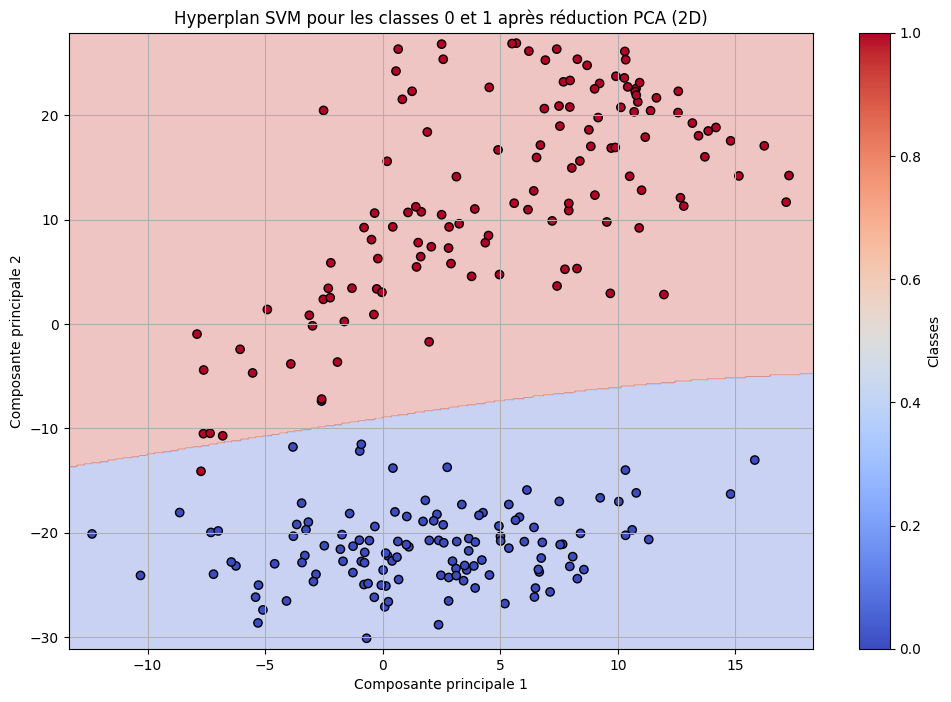

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

# Charger les données
digits = load_digits()
X, y = digits.data, digits.target

# Réduction de dimension avec PCA (2 dimensions)
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Sélectionner deux classes spécifiques (par exemple, classes 0 et 1)
class_1, class_2 = 0, 1
indices = (y == class_1) | (y == class_2)
X_binary = X_reduced[indices]
y_binary = y[indices]

# Diviser les données pour ces deux classes
X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.3, random_state=42, stratify=y_binary)

# Modèle SVM avec noyau RBF
svm_model = SVC(kernel='rbf', C=0.6, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

# Définir les limites de l'espace pour le tracé
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

# Prédire les classes pour chaque point de la grille
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Tracer les zones de décision
plt.figure(figsize=(12, 8))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

# Tracer les points de données
scatter = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolor='k')
plt.colorbar(scatter, label='Classes')
plt.title(f"Hyperplan SVM pour les classes {class_1} et {class_2} après réduction PCA (2D)")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.grid(True)
plt.show()


Meme pour les classes 2 et 5:

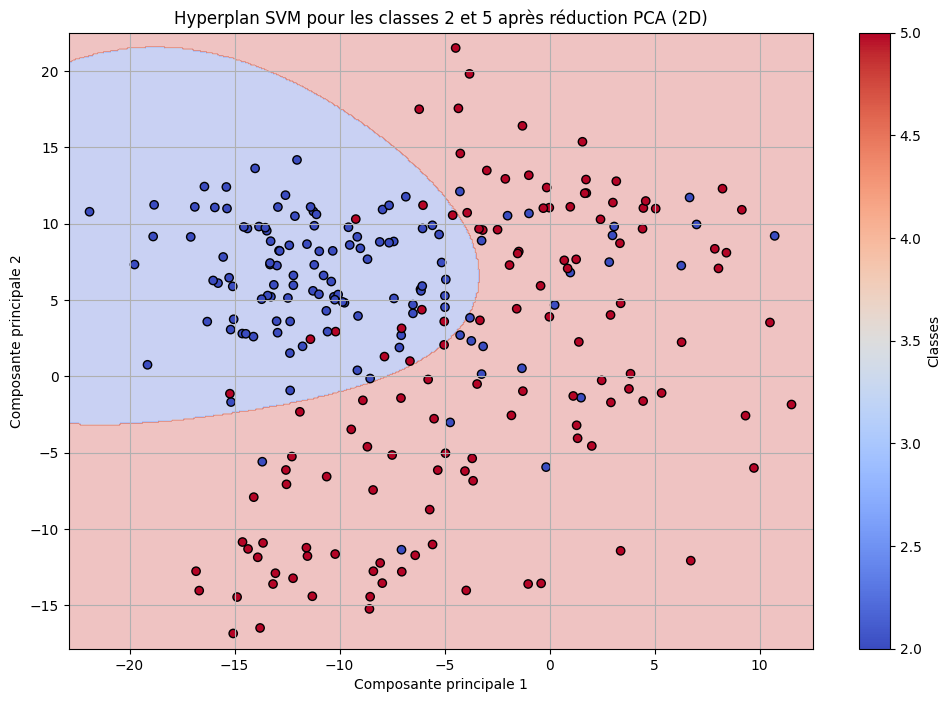

In [ ]:
# Charger les données
digits = load_digits()
X, y = digits.data, digits.target

# Réduction de dimension avec PCA (2 dimensions)
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Sélectionner deux classes spécifiques (par exemple, classes 0 et 1)
class_1, class_2 = 2, 5
indices = (y == class_1) | (y == class_2)
X_binary = X_reduced[indices]
y_binary = y[indices]

# Diviser les données pour ces deux classes
X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.3, random_state=42, stratify=y_binary)

# Modèle SVM avec noyau RBF
svm_model = SVC(kernel='rbf', C=0.6, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

# Définir les limites de l'espace pour le tracé
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

# Prédire les classes pour chaque point de la grille
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Tracer les zones de décision
plt.figure(figsize=(12, 8))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

# Tracer les points de données
scatter = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolor='k')
plt.colorbar(scatter, label='Classes')
plt.title(f"Hyperplan SVM pour les classes {class_1} et {class_2} après réduction PCA (2D)")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.grid(True)
plt.show()


**Visualisation des classes 0 et 1 en 3D et l'hyperplan séparant les deux classe:**

In [ ]:
import plotly.graph_objects as go


# Réduction de dimension avec PCA (3 dimensions)
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(X)

# Sélectionner deux classes spécifiques (par exemple, classes 0 et 1)
class_1, class_2 = 0, 1
indices = (y == class_1) | (y == class_2)
X_binary = X_reduced[indices]
y_binary = y[indices]

# Diviser les données pour ces deux classes
X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.3, random_state=42, stratify=y_binary)

# Modèle SVM avec noyau RBF
svm_model = SVC(kernel='linear', C=0.6, gamma='scale', random_state=42)  # Utilisation du noyau linéaire pour simplification
svm_model.fit(X_train, y_train)

# Calculer l'équation de l'hyperplan
w = svm_model.coef_[0]  # Poids du modèle
b = svm_model.intercept_[0]  # Biais du modèle

# Définir une grille 3D pour l'hyperplan
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 30), np.linspace(y_min, y_max, 30))

# Calcul de la 3e dimension de l'hyperplan (z)
zz = (-w[0] * xx - w[1] * yy - b) / w[2]

# Créer un DataFrame pour les données
df = pd.DataFrame(X_train, columns=["PCA1", "PCA2", "PCA3"])
df["Class"] = y_train

# Création de la figure avec plotly.graph_objects
fig = go.Figure()

# Ajouter les points de données
fig.add_trace(go.Scatter3d(
    x=df["PCA1"],
    y=df["PCA2"],
    z=df["PCA3"],
    mode='markers',
    marker=dict(size=5, color=df["Class"], colorscale='Viridis', opacity=0.8),
    name='Data Points'
))

# Ajouter l'hyperplan
fig.add_trace(go.Surface(
    x=xx, y=yy, z=zz,
    colorscale='RdBu',
    opacity=0.5,
    showscale=False,
    name='Hyperplane'
))

# Configurer le graphique
fig.update_layout(
    title=f"Hyperplan SVM en 3D pour les classes {class_1} et {class_2}",
    scene=dict(
        xaxis_title="PCA1",
        yaxis_title="PCA2",
        zaxis_title="PCA3"
    ),
    showlegend=True
)

# Afficher la figure
fig.show()


**Visualisation des classes 0, 1 et 2 en 3D et les hyperplans séparant chaque classe d'une autre:**

In [ ]:
# Réduction de dimension avec PCA (3 dimensions)
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(X)

# Sélectionner trois classes spécifiques (par exemple, classes 0, 1 et 2)
classes = [0, 1, 2]
indices = np.isin(y, classes)
X_binary = X_reduced[indices]
y_binary = y[indices]

# Diviser les données pour ces trois classes
X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.3, random_state=42, stratify=y_binary)

# Modèle SVM avec noyau linéaire
svm_model = SVC(kernel='rbf', C=0.6, gamma='scale', decision_function_shape='ovr', random_state=42)
svm_model.fit(X_train, y_train)

# Générer des points 3D pour prédire les zones de décision
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
z_min, z_max = X_train[:, 2].min() - 1, X_train[:, 2].max() + 1
xx, yy, zz = np.meshgrid(
    np.linspace(x_min, x_max, 30),
    np.linspace(y_min, y_max, 30),
    np.linspace(z_min, z_max, 30)
)

# Prédire les classes pour chaque point de la grille
grid = np.c_[xx.ravel(), yy.ravel(), zz.ravel()]
predictions = svm_model.predict(grid)
predictions = predictions.reshape(xx.shape)

# Créer un DataFrame pour les données
df = pd.DataFrame(X_train, columns=["PCA1", "PCA2", "PCA3"])
df["Class"] = y_train

# Création de la figure avec plotly.graph_objects
fig = go.Figure()

# Ajouter les points de données
fig.add_trace(go.Scatter3d(
    x=df["PCA1"],
    y=df["PCA2"],
    z=df["PCA3"],
    mode='markers',
    marker=dict(size=5, color=df["Class"], colorscale='Viridis', opacity=0.8),
    name='Data Points'
))

# Ajouter les hyperplans (zones de décision)
fig.add_trace(go.Volume(
    x=xx.ravel(),
    y=yy.ravel(),
    z=zz.ravel(),
    value=predictions.ravel(),
    isomin=0,
    isomax=2,
    opacity=0.1,  # Transparence pour mieux voir les points
    surface_count=20,
    colorscale='RdBu',
    name='Decision Boundaries'
))

# Configurer le graphique
fig.update_layout(
    title=f"Hyperplans SVM en 3D pour les classes {classes} (PCA)",
    scene=dict(
        xaxis_title="PCA1",
        yaxis_title="PCA2",
        zaxis_title="PCA3"
    ),
    showlegend=True
)

# Afficher la figure
fig.show()


# Partie 2: Données Iris

importation des données

In [ ]:
# Charger le dataset Iris
iris = load_iris()
X_iris=pd.DataFrame(iris.data)
y_iris=pd.DataFrame(iris.target)

In [ ]:
X_iris.info() # infos sur les features des données Iris

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [ ]:
X_iris.head()

0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2

la variable cible "y" a pour 3 valeurs 0, 1 et 2 qui sont équilibrés

In [ ]:
y_iris.value_counts()

0
0    50
1    50
2    50
Name: count, dtype: int64

Diviser les données et les normaliser pour meilleur performances des modèles

In [ ]:
# Diviser les données en ensembles d'entraînement et de test
X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(X_iris, y_iris, test_size=0.3, random_state=42, stratify=y_iris)

# Standardisation des données
scaler = StandardScaler()
X_iris_train = scaler.fit_transform(X_iris_train)
X_iris_test = scaler.transform(X_iris_test)

On va procéder de meme pour les données Iris, on a utilisé les memes hyperparamètres des deux modèles:

In [ ]:
dt_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 4, 5, 7],
    'min_samples_split': [3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [1, 2, 3,4],
    'ccp_alpha': [0.0, 0.001, 0.01, 0.1, 1, 2]
}

svm_params = {
        'C': [0.9,1, 1.1,1.2, 1.5],
        'kernel': ['poly', 'rbf', 'sigmoid'],
        'gamma': ['scale', 'auto'],
        'degree': [2, 3, 4, 5]
    }

GridSearch sur le modèle de l'arbre de décision:

In [ ]:
grid_search_decision_tree(X_iris_train, y_iris_train, X_iris_test, y_iris_test, dt_params)

Meilleurs paramètres pour l'arbre de décision : {'ccp_alpha': 0.0, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Score de validation croisée : 0.9523809523809522
Score sur le test set (Arbre de Décision) : 0.9111111111111111


In [ ]:
grid_search_decision_tree(X_iris_train, y_iris_train, X_iris_test, y_iris_test, dt_params)

Meilleurs paramètres pour l'arbre de décision : {'ccp_alpha': 0.0, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}
Score de validation croisée : 0.9523809523809522
Score sur le test set (Arbre de Décision) : 0.9555555555555556


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast



In [ ]:
grid_search_decision_tree(X_iris_train, y_iris_train, X_iris_test, y_iris_test, dt_params)

Meilleurs paramètres pour l'arbre de décision : {'ccp_alpha': 0.0, 'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 5}
Score de validation croisée : 0.9523809523809522
Score sur le test set (Arbre de Décision) : 0.9555555555555556


In [ ]:
grid_search_decision_tree(X_iris_train, y_iris_train, X_iris_test, y_iris_test, dt_params)

Meilleurs paramètres pour l'arbre de décision : {'ccp_alpha': 0.0, 'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5}
Score de validation croisée : 0.9523809523809522
Score sur le test set (Arbre de Décision) : 0.9777777777777777


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast



In [ ]:
grid_search_decision_tree(X_iris_train, y_iris_train, X_iris_test, y_iris_test, dt_params)

Meilleurs paramètres pour l'arbre de décision : {'ccp_alpha': 0.0, 'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 3}
Score de validation croisée : 0.9523809523809522
Score sur le test set (Arbre de Décision) : 0.9777777777777777


differents combinaisons des hyperparamètres ont été testé la meilleur combinaison est: {'ccp_alpha': 0.0, 'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 3}

il s'agit d'un arbre pas assez profond

GridSearch sur le modèle SVM:

In [ ]:
grid_search_svm(X_iris_train, y_iris_train, X_iris_test, y_iris_test, svm_params)

Meilleurs paramètres pour le SVM : {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Score de validation croisée : 0.980952380952381
Score sur le test set (SVM) : 0.9111111111111111


In [ ]:
grid_search_svm(X_iris_train, y_iris_train, X_iris_test, y_iris_test, svm_params)

Meilleurs paramètres pour le SVM : {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Score de validation croisée : 0.9619047619047619
Score sur le test set (SVM) : 0.9111111111111111


In [ ]:
grid_search_svm(X_iris_train, y_iris_train, X_iris_test, y_iris_test, svm_params)

Meilleurs paramètres pour le SVM : {'C': 2, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Score de validation croisée : 0.9714285714285714
Score sur le test set (SVM) : 0.9111111111111111


In [ ]:
grid_search_svm(X_iris_train, y_iris_train, X_iris_test, y_iris_test, svm_params)

Meilleurs paramètres pour le SVM : {'C': 0.05, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
Score de validation croisée : 0.761904761904762
Score sur le test set (SVM) : 0.6888888888888889


une petite valeur de C maximise la marge ce qui peut causer ke problème de l'underfitting

In [ ]:
grid_search_svm(X_iris_train, y_iris_train, X_iris_test, y_iris_test, svm_params)

Meilleurs paramètres pour le SVM : {'C': 0.8, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Score de validation croisée : 0.980952380952381
Score sur le test set (SVM) : 0.9333333333333333


meilleur combinaison de SVM à l'aide de GridSearch est:  {'C': 0.8, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}

On doit vérifier si avec ces paramètres optimisés, est ce qu'on a encore l'overfitting ou pas

In [241]:
# constuction des modèles
dt_iris_model = DecisionTreeClassifier(ccp_alpha= 0.005, criterion= 'gini', max_depth= 3, min_samples_leaf= 1, min_samples_split= 3, random_state=42)
svm_iris_model = SVC(C= 0.8, gamma= 'scale', kernel= 'linear', random_state=42)

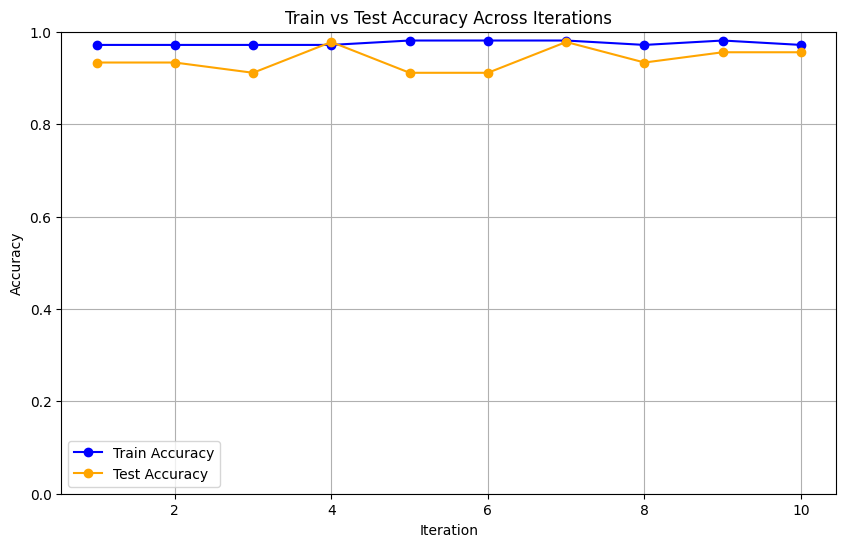

Précision moyenne sur les données d'entraînement : 0.98
Précision moyenne sur les données de test : 0.94
Pas d'indicateur significatif d'overfitting ou d'underfitting.


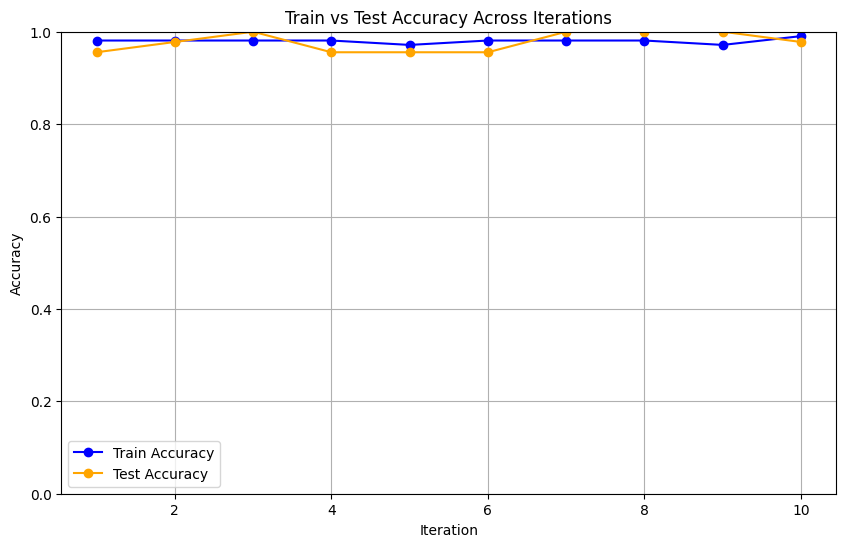

Précision moyenne sur les données d'entraînement : 0.98
Précision moyenne sur les données de test : 0.98
Pas d'indicateur significatif d'overfitting ou d'underfitting.


In [242]:
# Exécuter la validation croisée personnalisée et visualiser
cross_validation_visualization(dt_iris_model, X_iris, y_iris, n_iterations=10, test_size=0.3)
cross_validation_visualization(svm_iris_model, X_iris, y_iris, n_iterations=10, test_size=0.3)

Avec validation croisée voici les paramètres optimaux pour les deux modèles:

*   ccp_alpha= 0.005, criterion= 'gini', max_depth= 3, min_samples_leaf= 1, min_samples_split= 3
*   C= 0.8, gamma= 'scale', kernel= 'linear'

Le tableu des meilleurs performances sur les données Iris Train et Test:

| Modèles\ Nature des données           | Données Train                                  | Données Test               |
|---------------------|----------------------------------------------|-----------------------------------|
| Arbre de décision | 0.98 | 0.94               |
| SVM | 0.98  | 0.98 |


**Bilan des résultats pour les données Iris:**

*   **Performance globale :** Les résultats du tableau montrent que les deux modèles capturent bien les relations entre les données Iris, mais le SVM généralise légèrement mieux sur les données Test.
*   **Stabilité des modèles :** Pour l’Arbre de Décision, la différence (98% vs 94%) montre une légère tendance à l’overfitting, bien que les performances restent solides, tandis que pour le SVM, les performances sur Train et Test sont identiques (98%), indiquant une grande stabilité et une capacité de généralisation optimale.
*   **Pour le SVM :**
    1.   C=0.8 : Fournit un bon compromis entre maximisation de la marge et réduction des erreurs.
    2.   gamma='scale' : Ajuste automatiquement l’influence des points, idéal pour les données bien normalisées.
    3.   kernel='linear' : Approprié pour des données comme Iris, où les classes sont bien séparables dans un espace linéaire.

Les données Iris étant bien séparables et équilibrées, les deux modèles obtiennent des performances élevées, et le SVM avec un noyau linéaire est particulièrement efficace pour ces données, offrant une grande précision et stabilité (98% sur Train et Test).

**Visualisations des hyperplans en 2D en utilisant PCA:**

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



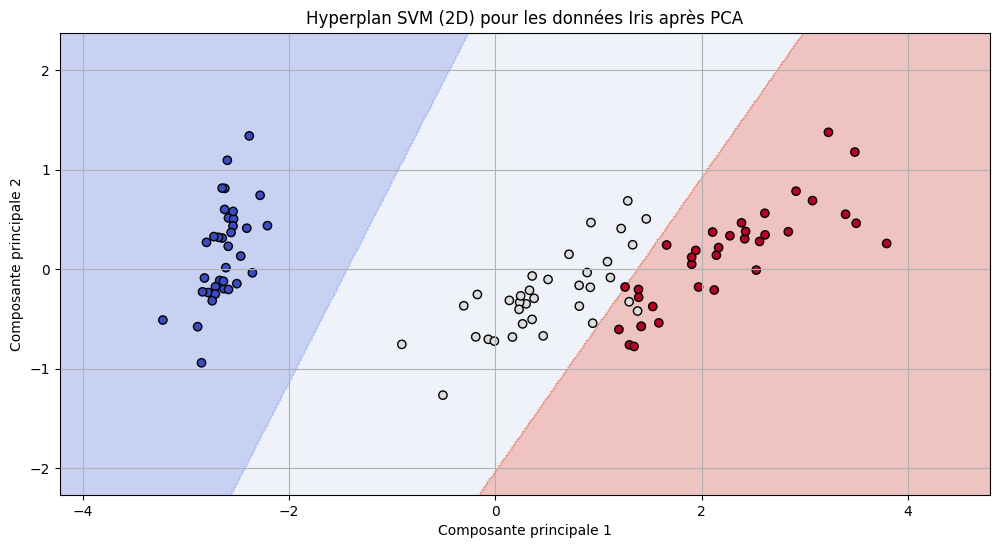

In [243]:
# Réduction de dimension avec PCA (2 dimensions)
pca = PCA(n_components=2)
X_iris_reduced = pca.fit_transform(X_iris)

# Diviser les données
X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(X_iris_reduced, y_iris, test_size=0.3, random_state=42, stratify=y_iris)

# Paramètres optimaux pour SVM
svm_iris_model = SVC(kernel='linear', C=0.8, gamma='scale', random_state=42)  # Paramètres optimaux trouvés

# Entraîner le modèle
svm_iris_model.fit(X_iris_train, y_iris_train)

# Générer une grille de points pour visualiser les hyperplans
x_iris_min, x_iris_max = X_iris_train[:, 0].min() - 1, X_iris_train[:, 0].max() + 1
y_iris_min, y_iris_max = X_iris_train[:, 1].min() - 1, X_iris_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_iris_min, x_iris_max, 500), np.linspace(y_iris_min, y_iris_max, 500))

# Prédictions pour la grille
Z_svm = svm_iris_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z_svm = Z_svm.reshape(xx.shape)


# Visualisation pour SVM
plt.figure(figsize=(12, 6))
plt.contourf(xx, yy, Z_svm, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_iris_train[:, 0], X_iris_train[:, 1], c=y_iris_train, cmap=plt.cm.coolwarm, edgecolor='k')
plt.title("Hyperplan SVM (2D) pour les données Iris après PCA")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.grid()
plt.show()

**Visualisations des hyperplans en 3D en utilisant PCA:**

In [244]:
# Réduction de dimension avec PCA (3 dimensions)
pca = PCA(n_components=3)
X_iris_reduced = pca.fit_transform(X_iris)

# Diviser les données
X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(X_iris_reduced, y_iris, test_size=0.3, random_state=42, stratify=y_iris)

# Paramètres optimaux pour SVM
svm_iris_model = SVC(kernel='linear', C=0.8, gamma='scale', decision_function_shape='ovr', random_state=42)  # Paramètres optimaux trouvés

# Entraîner le modèle
svm_iris_model.fit(X_iris_train, y_iris_train)

# Générer une grille 3D pour visualisation des hyperplans
x_iris_min, x_iris_max = X_iris_train[:, 0].min() - 1, X_iris_train[:, 0].max() + 1
y_iris_min, y_iris_max = X_iris_train[:, 1].min() - 1, X_iris_train[:, 1].max() + 1
z_iris_min, z_iris_max = X_iris_train[:, 2].min() - 1, X_iris_train[:, 2].max() + 1
xx, yy, zz = np.meshgrid(
    np.linspace(x_iris_min, x_iris_max, 30),
    np.linspace(y_iris_min, y_iris_max, 30),
    np.linspace(z_iris_min, z_iris_max, 30)
)

# Prédictions pour chaque point de la grille
grid = np.c_[xx.ravel(), yy.ravel(), zz.ravel()]
predictions = svm_iris_model.predict(grid).reshape(xx.shape)

# Créer un DataFrame pour les données
df = pd.DataFrame(X_iris_train, columns=["PCA1", "PCA2", "PCA3"])
df["Class"] = y_iris_train

# Visualisation interactive avec Plotly
fig = go.Figure()

# Ajouter les points d'entraînement
fig.add_trace(go.Scatter3d(
    x=df["PCA1"],
    y=df["PCA2"],
    z=df["PCA3"],
    mode='markers',
    marker=dict(size=5, color=df["Class"], colorscale='Viridis', opacity=0.8),
    name='Training Data'
))

# Ajouter les zones de décision pour SVM
fig.add_trace(go.Volume(
    x=xx.ravel(),
    y=yy.ravel(),
    z=zz.ravel(),
    value=predictions.ravel(),
    isomin=0,
    isomax=3,
    opacity=0.1,
    surface_count=20,
    colorscale='RdBu',
    name='SVM Decision Boundary'
))

# Configurer le graphique
fig.update_layout(
    title="Hyperplans SVM et Points de Données Iris (PCA 3D)",
    scene=dict(
        xaxis_title="PCA1",
        yaxis_title="PCA2",
        zaxis_title="PCA3"
    ),
    showlegend=True
)

# Afficher la figure
fig.show()


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



# Conclusion:

Les deux modèles sont adaptés pour des tâches de classification supervisée, chacun ayant ses forces. Le SVM est idéal pour des besoins de performance et de généralisation maximales, tandis que l'Arbre de Décision est recommandé lorsque l'interprétabilité du modèle est une priorité. Ce travail réalisé met en avant l'importance d'évaluer les modèles dans des contextes variés pour choisir celui qui convient le mieux à une tâche spécifique.